In [45]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import seaborn as sns
from scipy import stats as st
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
game_df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
game_df.head()

Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating  
0          51.0          8       322.0  Nintendo      E  
1           NaN        NaN         NaN       NaN    NaN  
2          73.0        8.3       709.0  Nintendo      E  
3          73.0          8       192.0  Nintendo      E  
4           NaN        NaN         NaN       NaN    NaN

In [47]:
#data clean


#Renaming columns for ease of use
#Droping games without a year of release or genre
#Convert to int
#Creating a new column
#Eliminating all rows with NaN value

In [48]:
#Calculating the sum of the NaN values.
miss_values = game_df.isnull().sum()
miss_values

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [49]:
game_df = game_df.dropna()
# Convert to int
game_df['User_Score'] = game_df.User_Score.astype('float64')
game_df['Year_of_Release'] = game_df.Year_of_Release.astype('int64')
game_df['User_Count'] = game_df.User_Count.astype('int64')
game_df['Critic_Count'] = game_df.Critic_Count.astype('int64')


<Figure size 1008x1008 with 0 Axes>

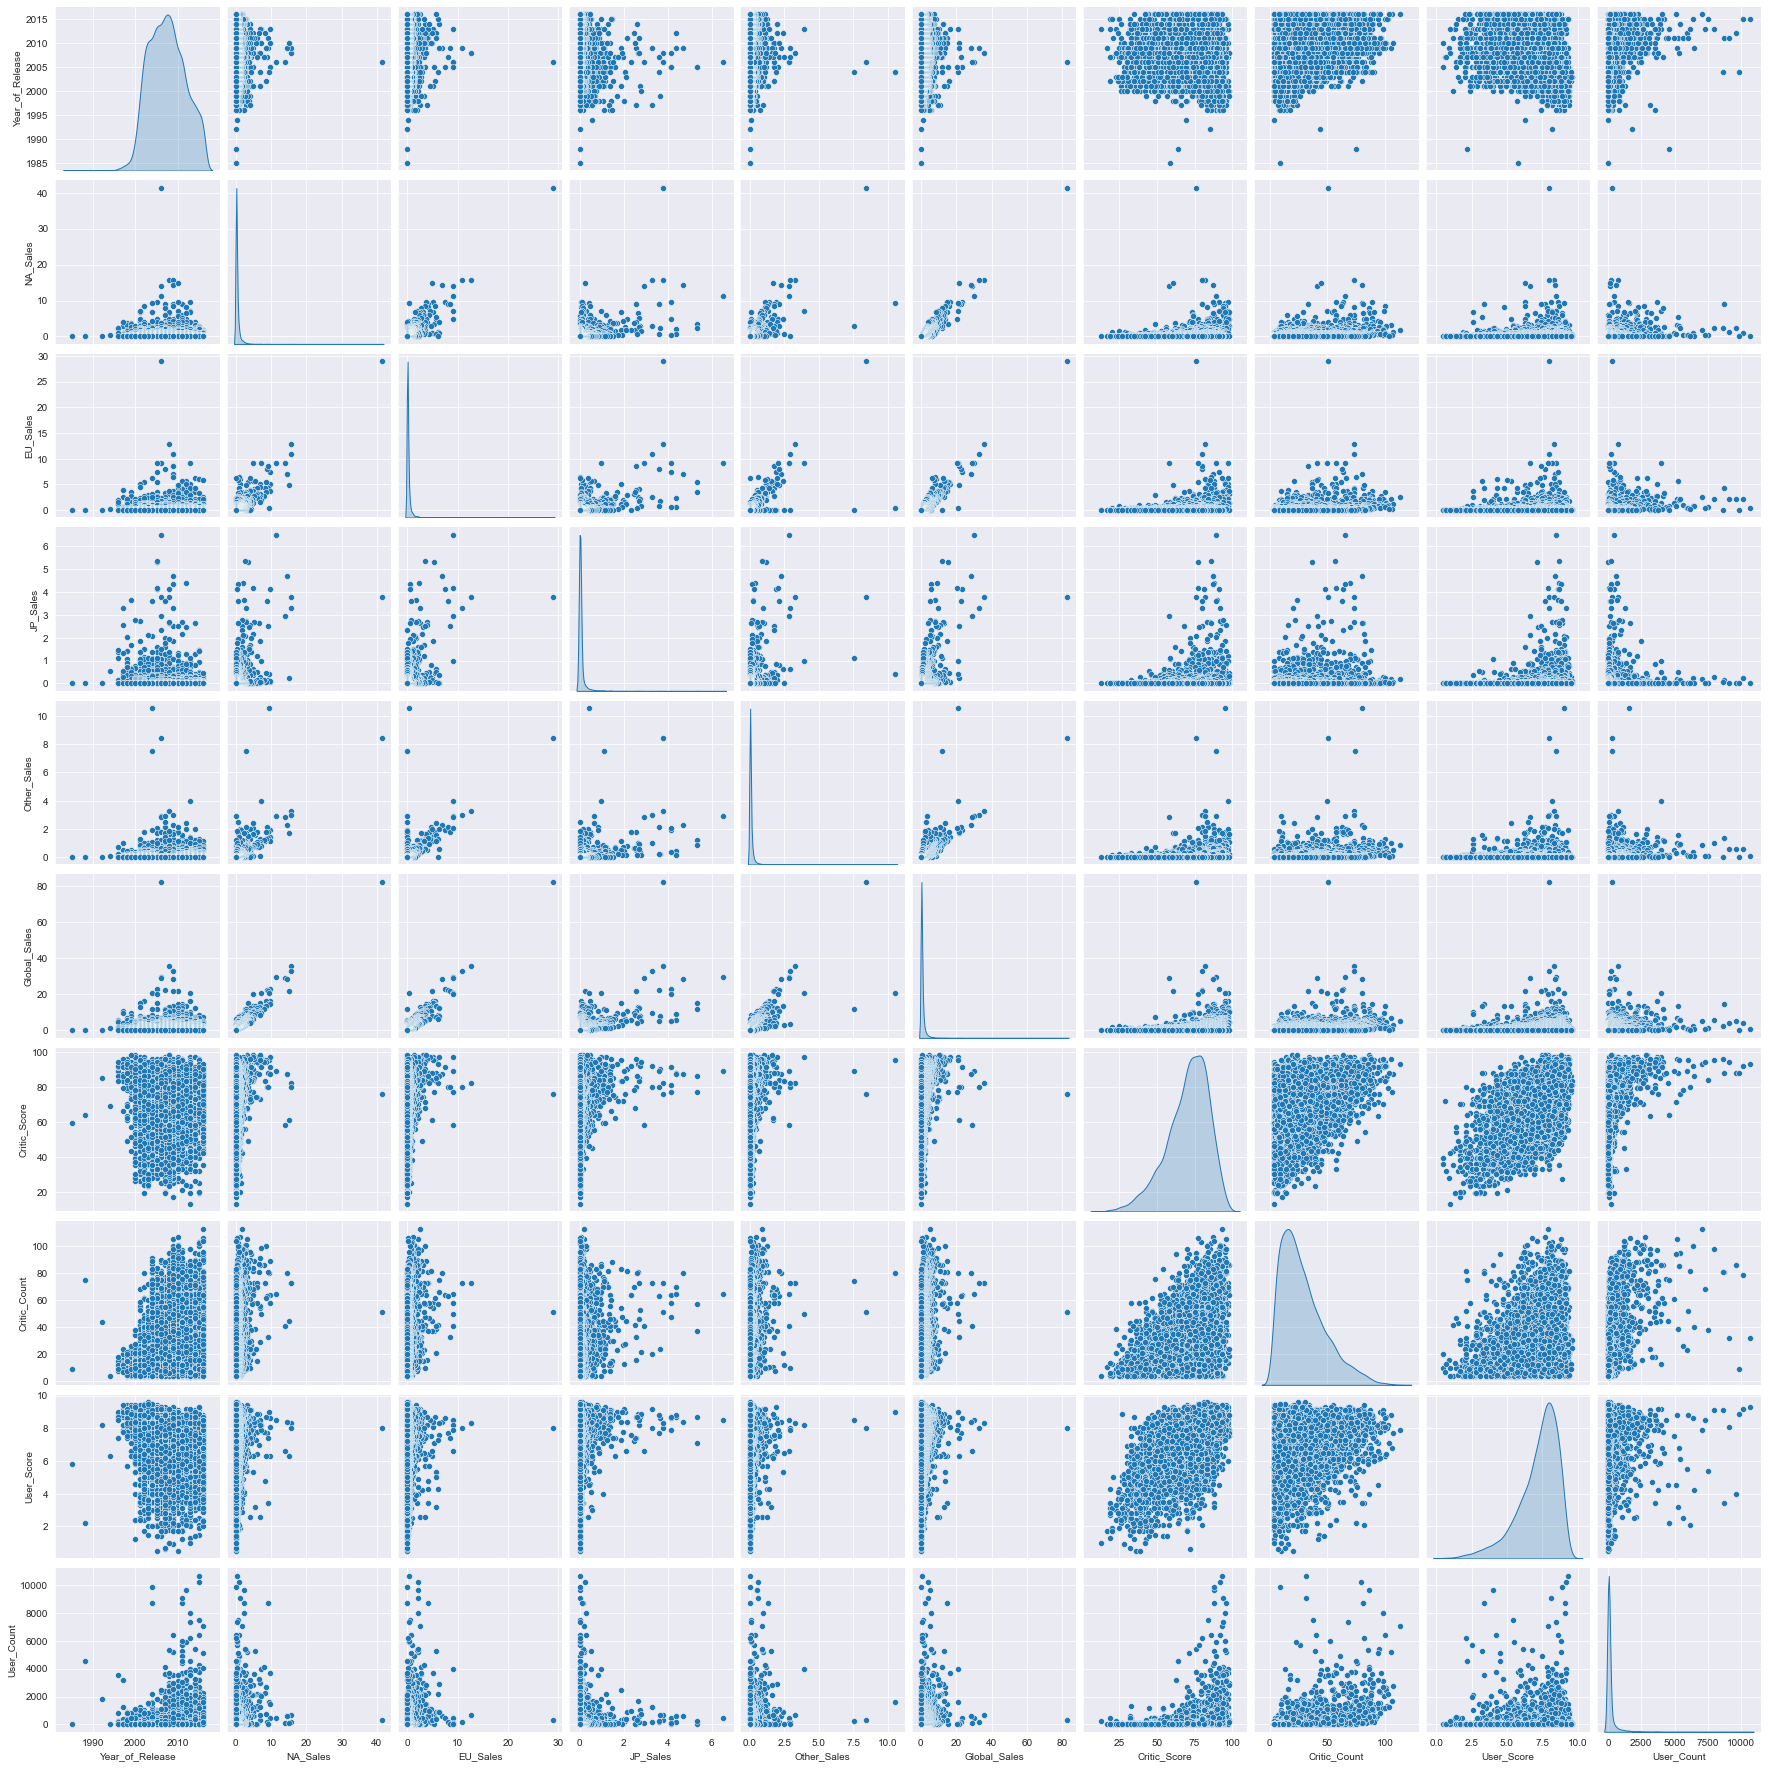

In [52]:
plt.figure(figsize=(14, 14))

sns.pairplot(game_df, diag_kind='kde');

<Figure size 2520x1080 with 0 Axes>

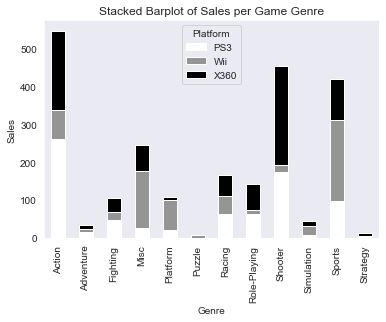

In [53]:
plt.figure(figsize=(35,15))

video7th = game_df[(game_df['Platform'] == 'Wii') | (game_df['Platform'] == 'PS3') | (game_df['Platform'] == 'X360')]

genreSales = video7th.groupby(['Genre','Platform']).Global_Sales.sum()
genreSales.unstack().plot(kind='bar',stacked=True,  colormap= 'Greys', grid=False)
plt.title('Stacked Barplot of Sales per Game Genre')
plt.ylabel('Sales')
plt.show()

In [54]:
game_df['Rating'].unique()#array(['E', 'M', 'T', 'E10+', 'AO', 'K-A', 'RP'], dtype=object)



array(['E', 'M', 'T', 'E10+', 'AO', 'K-A', 'RP'], dtype=object)

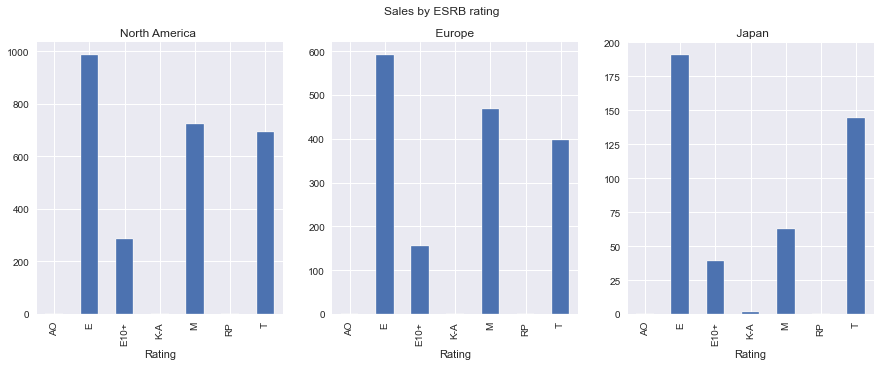

In [139]:
region_sales = ['NA_Sales', 'EU_Sales', 'JP_Sales']
regions = ['North America ',' Europe ',' Japan']


fig, ax = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Sales by ESRB rating')
for i, sale in enumerate(region_sales):
    for region in regions:
        game_df.groupby('Rating')[sale].sum().plot(
                                                       kind='bar', ax=ax[i], title=regions[i])

In [56]:
# Bin NA_Sales into Blockbuster or NB based on units sold
BlockBuster = game_df.loc[:, "Global_Sales"] > 1.0


In [57]:
#dataset.loc[:,"Global_Sales"] = dataset.loc[:,"Global_Sales"].astype(int)

game_df.loc[BlockBuster, "Global_Sales"] = 1
game_df.loc[~BlockBuster, "Global_Sales"] = 0


In [58]:
# Drop nulls
nullRemoved = game_df.dropna(axis=0) #6825 observations with no nulls


In [59]:
#Group like categories: AO -> M, RP -> T, K-A/E10+ -> E
#array(['E', 'M', 'T]
nullRemoved.loc[nullRemoved.loc[:, "Rating"] == "AO", "Rating"] = "M"
nullRemoved.loc[nullRemoved.loc[:, "Rating"] == "K-A", "Rating"] = "E"
nullRemoved.loc[nullRemoved.loc[:, "Rating"] == "RP", "Rating"] = "T"
nullRemoved.loc[nullRemoved.loc[:, "Rating"] == "E10+", "Rating"] = "E"

In [145]:
import plotly.express as px
count=nullRemoved['Rating'].value_counts().reset_index()
count.columns=['Rating', 'Count']
count
px.bar(count, x='Rating', y='Count')

### "EC" ("Early childhood")
- "For Young Children": The game is suitable for children aged 3 years and older and does not contain materials that parents might find inappropriate. The products that have received this rating are originally designed for children and are usually educational games. Some advanced educational games may be rated "Everyone".
### “E” (“Everyone”) - 
“For everyone”: Content is quite suitable for the age group of 6 years and older; such games can also be enjoyed by adults. Games with this rating may contain minimal violence, mostly of a "cartoon" nature. The first game to receive this rating was The Simpsons Cartoon Studio, released in 1996. Originally "K-A" ("Kids to Adults")
### “E10 +” (“Everyone 10 and older”) -
“For everyone 10 and older”: Projects with this rating may contain a little more cartoon or soft violence, or slightly explicit scenes or a minimum amount of blood. The rating was adopted by the ESRB on March 2, 2005. The first game to receive this rating was Donkey Kong: Jungle Beat.
### "T" ("Teen") - 
"Teens": This game is suitable for people aged 13 and over. Projects in this category may contain violence, obscene scenes, crude humor, moderately explicit sexual content, gore, or infrequent use.
### "M" ("Mature") -
"For Adults": The game content is not suitable for teenagers under 17 years of age. Projects with this rating may contain quite violent violence, a large amount of gore with dismemberment, obscene sex scenes or gross profanity that is undesirable for a younger audience.
### "AO" ("Adults Only 18 +") - 
"Adults Only": Game content is only for adults over 18 years of age. Products in this category may contain prolonged violent and / or highly explicit sexual content, as well as nude scenes. Most of these games are designed for personal computers running Microsoft Windows and Apple Macintosh. The "Adults Only" rating is the subject of much debate, as it imposes serious restrictions on the sale of the game.
### "RP" ("Rating Pending") - 
"Rating Pending": The product has been submitted to ESRB and is pending a rating. This logo is used only on promotional presentations and in demo versions of games before the official release date.


In [60]:
nullRemoved

Name Platform  Year_of_Release     Genre  \
0                             Wii Sports      Wii             2006    Sports   
2                         Mario Kart Wii      Wii             2008    Racing   
3                      Wii Sports Resort      Wii             2009    Sports   
6                  New Super Mario Bros.       DS             2006  Platform   
7                               Wii Play      Wii             2006      Misc   
...                                  ...      ...              ...       ...   
16667         E.T. The Extra-Terrestrial      GBA             2001    Action   
16677     Mortal Kombat: Deadly Alliance      GBA             2002  Fighting   
16696  Metal Gear Solid V: Ground Zeroes       PC             2014    Action   
16700                             Breach       PC             2011   Shooter   
16706            STORM: Frontline Nation       PC             2011  Strategy   

                          Publisher  NA_Sales  EU_Sales  JP_Sales  \
0                          Nintendo     41.36     28.96      3.77   
2                          Nintendo     15.68     12.76      3.79   
3                          Nintendo     15.61     10.93      3.28   
6                          Nintendo     11.28      9.14      6.50   
7                          Nintendo     13.96      9.18      2.93   
...                             ...       ...       ...       ...   
16667                      NewKidCo      0.01      0.00      0.00   
16677                  Midway Games      0.01      0.00      0.00   
16696  Konami Digital Entertainment      0.00      0.01      0.00   
16700                     Destineer      0.01      0.00      0.00   
16706                       Unknown      0.00      0.01      0.00   

       Other_Sales  Global_Sales  Critic_Score  Critic_Count  User_Score  \
0             8.45           1.0          76.0            51         8.0   
2             3.29           1.0          82.0            73         8.3   
3             2.95           1.0          80.0            73         8.0   
6             2.88           1.0          89.0            65         8.5   
7             2.84           1.0          58.0            41         6.6   
...            ...           ...           ...           ...         ...   
16667         0.00           0.0          46.0             4         2.4   
16677         0.00           0.0          81.0            12         8.8   
16696         0.00           0.0          80.0            20         7.6   
16700         0.00           0.0          61.0            12         5.8   
16706         0.00           0.0          60.0            12         7.2   

       User_Count           Developer Rating  
0             322            Nintendo      E  
2             709            Nintendo      E  
3             192            Nintendo      E  
6             431            Nintendo      E  
7             129            Nintendo      E  
...           ...                 ...    ...  
16667          21       Fluid Studios      E  
16677           9     Criterion Games      M  
16696         412  Kojima Productions      M  
16700          43        Atomic Games      T  
16706          13              SimBin      E  

[6825 rows x 16 columns]

In [61]:
#delet NA_Sales,EU_Sales,JP_Sales,Other_Sales col from datafram
del nullRemoved['NA_Sales']
del nullRemoved['EU_Sales']
del nullRemoved['JP_Sales']
del nullRemoved['Other_Sales']
nullRemoved.head()

Name Platform  Year_of_Release     Genre Publisher  \
0             Wii Sports      Wii             2006    Sports  Nintendo   
2         Mario Kart Wii      Wii             2008    Racing  Nintendo   
3      Wii Sports Resort      Wii             2009    Sports  Nintendo   
6  New Super Mario Bros.       DS             2006  Platform  Nintendo   
7               Wii Play      Wii             2006      Misc  Nintendo   

   Global_Sales  Critic_Score  Critic_Count  User_Score  User_Count Developer  \
0           1.0          76.0            51         8.0         322  Nintendo   
2           1.0          82.0            73         8.3         709  Nintendo   
3           1.0          80.0            73         8.0         192  Nintendo   
6           1.0          89.0            65         8.5         431  Nintendo   
7           1.0          58.0            41         6.6         129  Nintendo   

  Rating  
0      E  
2      E  
3      E  
6      E  
7      E

In [62]:
def create_label_encoder_dict(df):
    from sklearn.preprocessing import LabelEncoder

    label_encoder_dict = {}
    for column in df.columns:
        # Only create encoder for categorical data types
        if not np.issubdtype(df[column].dtype, np.number) and column != 'Age':
            label_encoder_dict[column]= LabelEncoder().fit(df[column].astype(str))
    return label_encoder_dict

In [63]:
label_encoders = create_label_encoder_dict(nullRemoved)
print("Encoded Values for each Label")
print("="*32)
for column in label_encoders:
    print("="*32)
    print('Encoder(%s) = %s' % (column, label_encoders[column].classes_ ))
    print(pd.DataFrame([range(0,len(label_encoders[column].classes_))], columns=label_encoders[column].classes_, index=['Encoded Values'] ).T)

Encoded Values for each Label
Encoder(Name) = [' Tales of Xillia 2' '.hack//Infection Part 1' '.hack//Mutation Part 2'
 ... "nail'd" 'pro evolution soccer 2011' 'uDraw Studio: Instant Artist']
                              Encoded Values
 Tales of Xillia 2                         0
.hack//Infection Part 1                    1
.hack//Mutation Part 2                     2
.hack//Outbreak Part 3                     3
007 Racing                                 4
...                                      ...
inFAMOUS 2                              4372
inFAMOUS: Second Son                    4373
nail'd                                  4374
pro evolution soccer 2011               4375
uDraw Studio: Instant Artist            4376

[4377 rows x 1 columns]
Encoder(Platform) = ['3DS' 'DC' 'DS' 'GBA' 'GC' 'PC' 'PS' 'PS2' 'PS3' 'PS4' 'PSP' 'PSV' 'Wii'
 'WiiU' 'X360' 'XB' 'XOne']
      Encoded Values
3DS                0
DC                 1
DS                 2
GBA                3
GC             

In [64]:
nullRemoved_data = nullRemoved.copy() # create copy of initial data set
for column in nullRemoved_data.columns:
    if column in label_encoders:
        nullRemoved_data[column] = label_encoders[column].transform(nullRemoved_data[column])
print("Transformed data set")
print("="*32)
nullRemoved_data.head()

Transformed data set


Name  Platform  Year_of_Release  Genre  Publisher  Global_Sales  \
0  4215        12             2006     10        160           1.0   
2  2087        12             2008      6        160           1.0   
3  4217        12             2009     10        160           1.0   
6  2567         2             2006      4        160           1.0   
7  4213        12             2006      3        160           1.0   

   Critic_Score  Critic_Count  User_Score  User_Count  Developer  Rating  
0          76.0            51         8.0         322        771       0  
2          82.0            73         8.3         709        771       0  
3          80.0            73         8.0         192        771       0  
6          89.0            65         8.5         431        771       0  
7          58.0            41         6.6         129        771       0

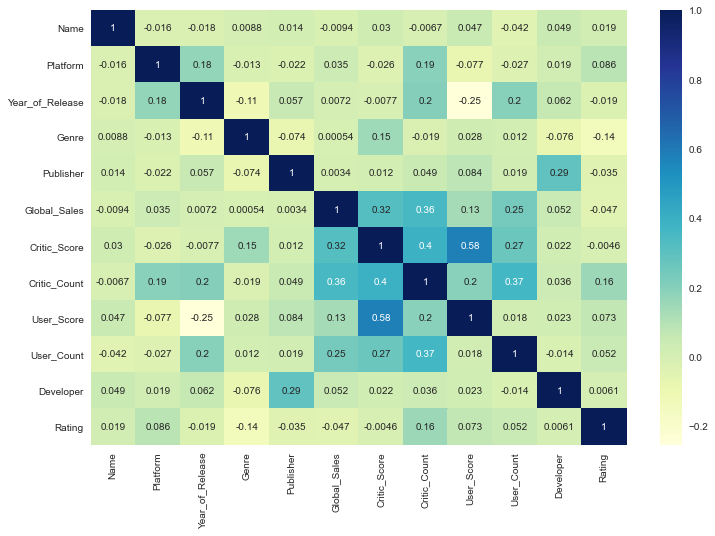

In [144]:
plt.figure(figsize=(12, 8))

vg_corr = nullRemoved_data.corr()
sns.heatmap(vg_corr,cmap="YlGnBu",
            xticklabels = vg_corr.columns.values,
            yticklabels = vg_corr.columns.values,
            annot = True);

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [99]:
X = nullRemoved_data.drop("Rating", axis=1)
Y = nullRemoved_data["Rating"]

In [100]:
#nullRemoved_data["Rating"].unique()

In [101]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=10)

In [102]:
train_df = X_train.copy()
train_df['Rating'] = Y_train
train_df.head()

Name  Platform  Year_of_Release  Genre  Publisher  Global_Sales  \
383    1544         2             2008      3         11           1.0   
1607   4147         7             2008      2        220           1.0   
16532  2809         5             2009     10        123           0.0   
12544   760         5             2011      0         37           0.0   
14472   101         5             1985      9         11           0.0   

       Critic_Score  Critic_Count  User_Score  User_Count  Developer  Rating  
383            71.0            70         8.8          29       1220       0  
1607           78.0             9         6.9          34       1262       2  
16532          78.0             8         6.9          49        619       0  
12544          66.0            10         5.3          54        205       1  
14472          59.0             9         5.8          19       1232       2

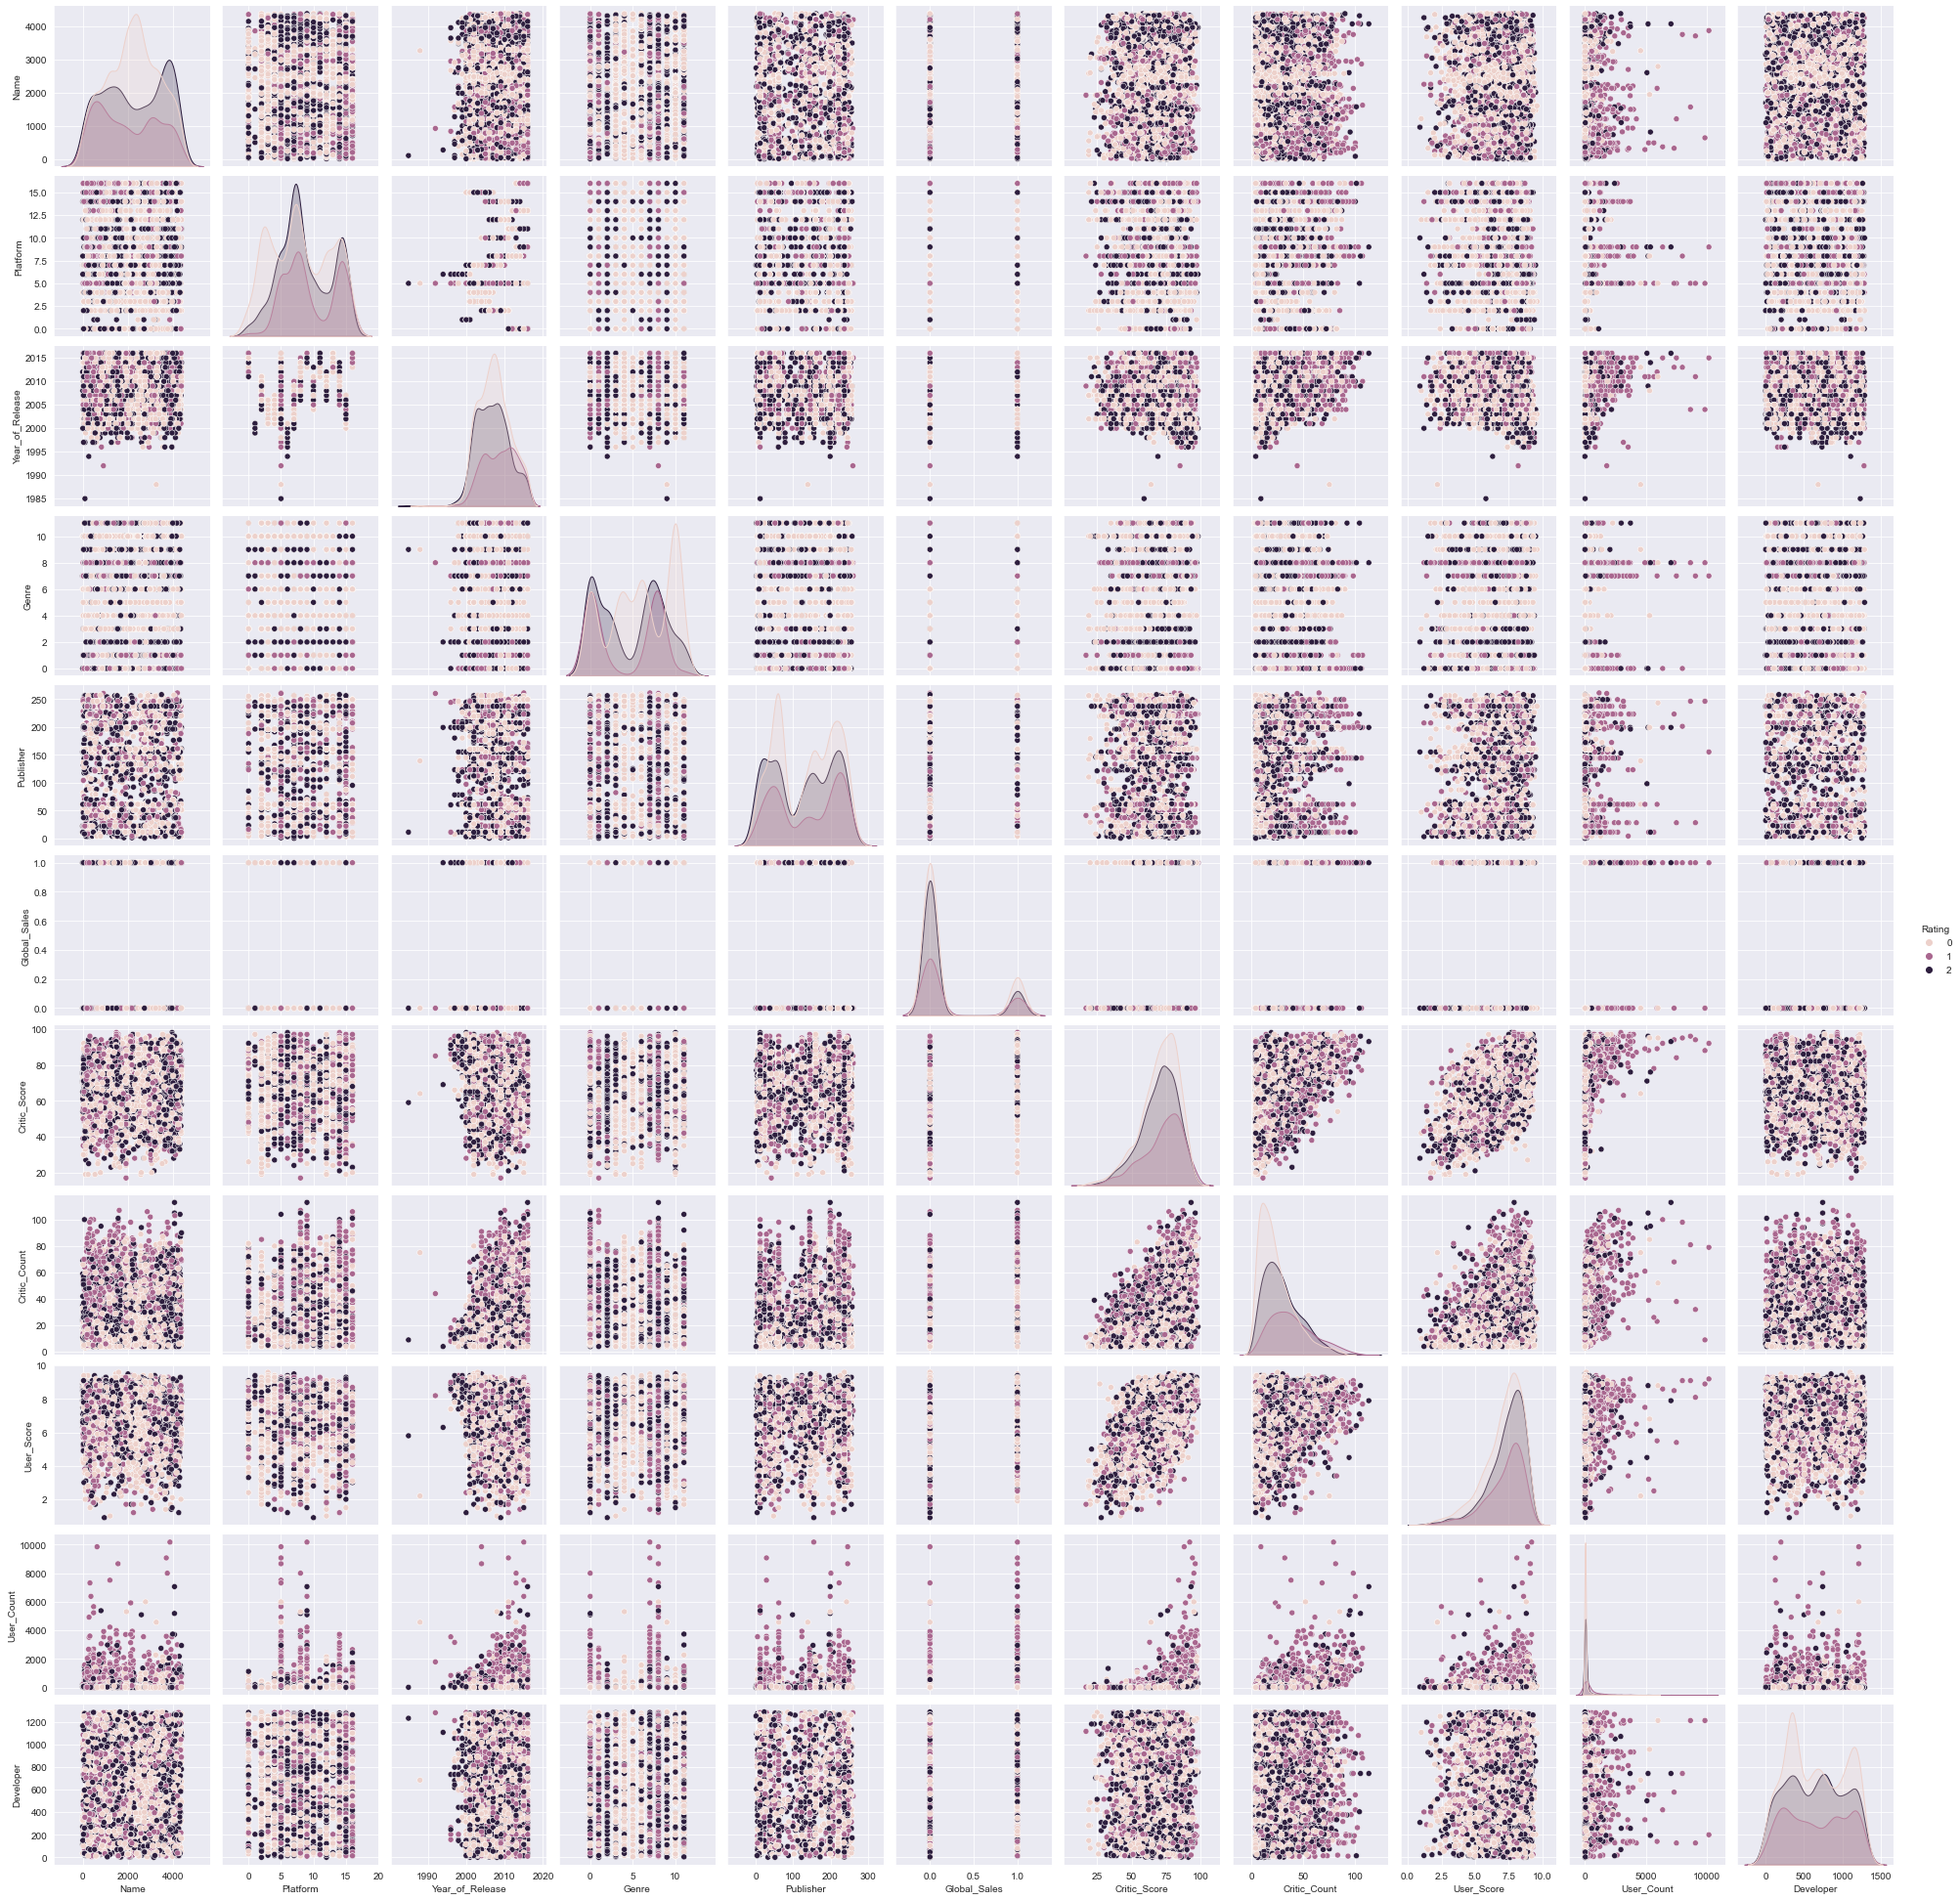

In [103]:
sns.pairplot(train_df, hue='Rating');

# Modeling

### Model: LogisticRegression

In [104]:
from sklearn.metrics import f1_score

#LogisticRegression
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(solver='liblinear',multi_class='ovr')
model_lr.fit(X_train, Y_train)
X_train_prediction = model_lr.predict(X_train)
X_test_prediction = model_lr.predict(X_test)

lr_training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', lr_training_data_accuracy)
lr_testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of testing data : ', lr_testing_data_accuracy)
print('Accuracy f1_score of testing data : ',f1_score(Y_test,X_test_prediction,average=None))

Accuracy score of training data :  0.5496336996336997
Accuracy score of testing data :  0.5326007326007326
Accuracy f1_score of testing data :  [0.65477008 0.35588972 0.40961098]


### Model: Decision Tree

In [146]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(max_depth=3, criterion="entropy", random_state=1000)
model_dt.fit(X_train, Y_train)
X_train_prediction = model_dt.predict(X_train)
X_test_prediction = model_dt.predict(X_test)
sgd_training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', sgd_training_data_accuracy)
sgd_testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of testing data : ', sgd_testing_data_accuracy)
print('Accuracy f1_score of testing data : ', f1_score(Y_test,X_test_prediction,average=None))

Accuracy score of training data :  0.5694139194139194
Accuracy score of testing data :  0.5582417582417583
Accuracy f1_score of testing data :  [0.592827   0.43243243 0.5754858 ]


### Model: RandomForest

In [148]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=500,max_depth=3, criterion="entropy",random_state=1000)
model_rf.fit(X_train, Y_train)
X_train_prediction = model_rf.predict(X_train)
X_test_prediction = model_rf.predict(X_test)
rf_training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', rf_training_data_accuracy)
rf_testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of testing data : ', rf_testing_data_accuracy)

print('Accuracy f1_score of testing data : ', f1_score(Y_test,X_test_prediction,average=None))

Accuracy score of training data :  0.5915750915750916
Accuracy score of testing data :  0.5787545787545788
Accuracy f1_score of testing data :  [0.70612813 0.43333333 0.43935927]


### Model: naive bayes

In [149]:
#naive bayes
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train, Y_train)
X_train_prediction = model_nb.predict(X_train)
X_test_prediction = model_nb.predict(X_test)
nb_training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', nb_training_data_accuracy)
nb_testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of testing data : ', nb_testing_data_accuracy)

print('Accuracy f1_score of testing data : ', f1_score(Y_test,X_test_prediction,average=None))

Accuracy score of training data :  0.532051282051282
Accuracy score of testing data :  0.5194139194139195
Accuracy f1_score of testing data :  [0.66212871 0.33915212 0.2973352 ]


### Model: KNeighbors

In [150]:
#KNeighbors
from sklearn.neighbors import KNeighborsClassifier
model_KN= KNeighborsClassifier(n_neighbors=10, algorithm='ball_tree')
model_KN.fit(X_train, Y_train)
X_train_prediction = model_KN.predict(X_train)
X_test_prediction = model_KN.predict(X_test)
knn_training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', knn_training_data_accuracy)
knn_testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of testing data : ', knn_testing_data_accuracy)

print('Accuracy f1_score of testing data : ', f1_score(Y_test,X_test_prediction,average=None))

Accuracy score of training data :  0.7005494505494505
Accuracy score of testing data :  0.6087912087912087
Accuracy f1_score of testing data :  [0.6875     0.52765957 0.54008439]


### Voting Classifier

In [151]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

rfClf = RandomForestClassifier(n_estimators=200, random_state=0) 
dtClf = DecisionTreeClassifier(max_depth=4)
svmClf = SVC(probability=True, random_state=0)
logClf = LogisticRegression(random_state=0)
nbclf = GaussianNB()
knclf=KNeighborsClassifier(n_neighbors=10, algorithm='ball_tree')

# constructing the ensemble classifier by mentioning the individual classifiers.
clf2 = VotingClassifier(estimators = [('rf',rfClf), ('dt',dtClf), ('svm',svmClf), ('log', logClf),('nb',nbclf),('kn',knclf)], voting='soft') 

# train the ensemble classifier
clf2.fit(X_train, Y_train)

clf2_pred = clf2.predict(X_test)
print('Accuracy score', accuracy_score(Y_test, clf2_pred))
print('Accuracy f1_score : ', f1_score(Y_test,clf2_pred,average=None))

Accuracy score 0.6732600732600733
Accuracy f1_score :  [0.78100638 0.46969697 0.59588299]


### The ROC curve

In [152]:
# predict probabilities
pred_prob1 = model_lr.predict_proba(X_test)
pred_prob2 = model_KN.predict_proba(X_test)
pred_prob3 = model_rf.predict_proba(X_test)
pred_prob4 = model_dt.predict_proba(X_test)
pred_prob5 = model_nb.predict_proba(X_test)
#pred_prob6 = model.predict_proba(X_test)

In [153]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(Y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(Y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(Y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(Y_test, pred_prob5[:,1], pos_label=1)
                                


In [154]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)



In [155]:
from sklearn.metrics import roc_auc_score
# auc scores
auc_score1 = roc_auc_score(Y_test, pred_prob1,multi_class='ovr')
auc_score2 = roc_auc_score(Y_test, pred_prob2,multi_class='ovr')
auc_score3 = roc_auc_score(Y_test, pred_prob3,multi_class='ovr')
auc_score4 = roc_auc_score(Y_test, pred_prob4,multi_class='ovr')
auc_score5 = roc_auc_score(Y_test, pred_prob5,multi_class='ovr')






print(auc_score1, auc_score2,auc_score3,auc_score4,auc_score5)


0.6907559869002317 0.7777523470927873 0.7860059109175367 0.7092482015456131 0.6924973179022288


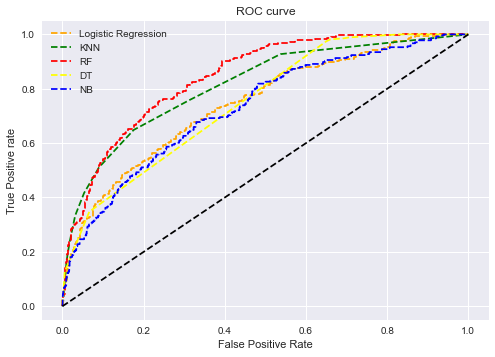

In [156]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='RF')
plt.plot(fpr4, tpr4, linestyle='--',color='yellow', label='DT')
plt.plot(fpr5, tpr5, linestyle='--',color='blue', label='NB')


plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();
